In [3]:
library(CellChat)
library(Seurat)
library(Matrix)

Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: igraph

Warning message:
“package ‘igraph’ was built under R version 4.3.1”

Attaching package: ‘igraph’


The following objects are masked from ‘package:dplyr’:

    as_data_frame, groups, union


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union


Loading required package: ggplot2

Loading required package: SeuratObject

Warning message:
“package ‘SeuratObject’ was built under R version 4.3.1”
Loading required package: sp

Warning message:
“package ‘sp’ was built under R version 4.3.2”

Attaching package: ‘SeuratObject’


The following object is masked from ‘package:BiocGenerics’:

    intersect


The following object is masked from ‘p

In [4]:
rm(list = ls())
gc()

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,5639227,301.2,10756640,574.5,10756640,574.5
Vcells,9487051,72.4,594752734,4537.7,1575569107,12020.7


In [5]:
# read the matrix
matrix = readMM("../Result/R_conversion/integrated_matrix.mtx")

# read the cell and gene names
cell_name = read.csv("../Result/R_conversion/cell_names.csv")
feature_name = read.csv("../Result/R_conversion/gene_names.csv")

# attached the gene and cells to the matrix
rownames(matrix) = cell_name$X0
colnames(matrix) = feature_name$X0

# read the meta
meta_info = read.csv("../Result/R_conversion/meta_info.csv")

In [7]:
# create the cellchat object
cellchat <- createCellChat(object = t(matrix), meta = meta_info, group.by = "annotation")

[1] "Create a CellChat object from a data matrix"
The cell barcodes in 'meta' is  1 2 3 4 5 6 


Warning message in createCellChat(object = t(matrix), meta = meta_info, group.by = "annotation"):
“The cell barcodes in 'meta' is different from those in the used data matrix.
              We now simply assign the colnames in the data matrix to the rownames of 'mata'!”


Set cell identities for the new CellChat object 
The cell groups used for CellChat analysis are  L1, L2/3, L4, L5, L6, WM 


In [8]:
cellchat <- addMeta(cellchat, meta = meta_info)
cellchat <- setIdent(cellchat, ident.use = "annotation") # set "labels" as default cell identity
levels(cellchat@idents) # show factor levels of the cell labels
groupSize <- as.numeric(table(cellchat@idents)) # number of cells in each cell group

[1] "L1"   "L2/3" "L4"   "L5"   "L6"   "WM"

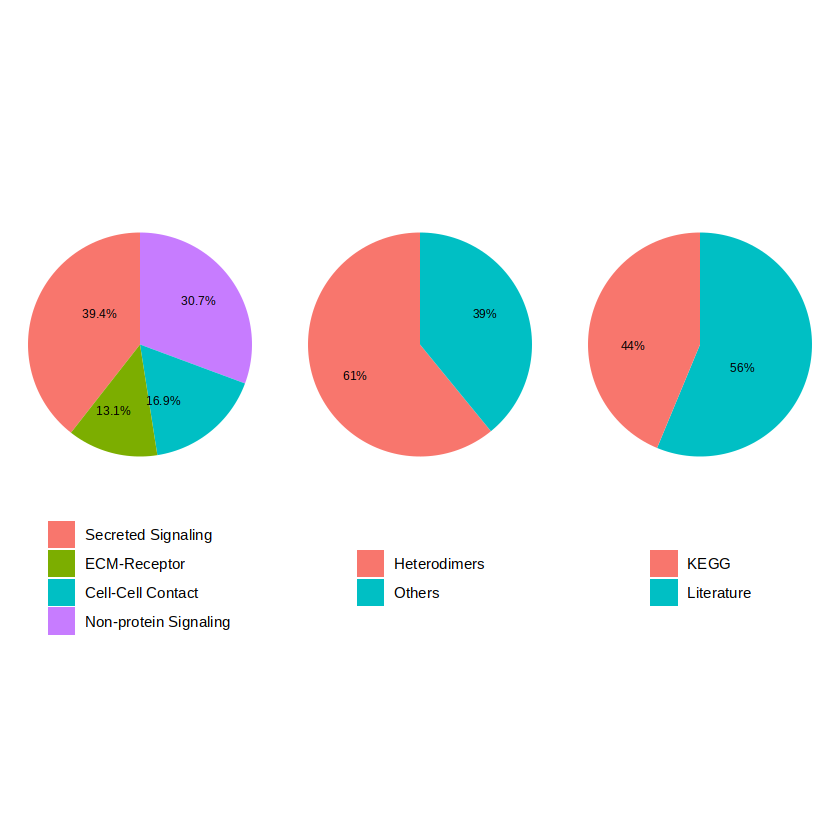

In [9]:
# set the ligand-receptor interaction database
CellChatDB <- CellChatDB.human # use CellChatDB.mouse if running on mouse data
showDatabaseCategory(CellChatDB)

In [10]:
dplyr::glimpse(CellChatDB$interaction)

# use a subset of CellChatDB for cell-cell communication analysis
CellChatDB.use <- subsetDB(CellChatDB, search = "Secreted Signaling", key = "annotation") # use Secreted Signaling
# use all CellChatDB for cell-cell communication analysis
# CellChatDB.use <- CellChatDB # simply use the default CellChatDB

# set the used database in the object
cellchat@DB <- CellChatDB.use

Rows: 3,249
Columns: 28
$ interaction_name         <chr> "TGFB1_TGFBR1_TGFBR2", "TGFB2_TGFBR1_TGFBR2",…
$ pathway_name             <chr> "TGFb", "TGFb", "TGFb", "TGFb", "TGFb", "TGFb…
$ ligand                   <chr> "TGFB1", "TGFB2", "TGFB3", "TGFB1", "TGFB1", …
$ receptor                 <chr> "TGFbR1_R2", "TGFbR1_R2", "TGFbR1_R2", "ACVR1…
$ agonist                  <chr> "TGFb agonist", "TGFb agonist", "TGFb agonist…
$ antagonist               <chr> "TGFb antagonist", "TGFb antagonist", "TGFb a…
$ co_A_receptor            <chr> "", "", "", "", "", "", "", "", "", "", "", "…
$ co_I_receptor            <chr> "TGFb inhibition receptor", "TGFb inhibition …
$ evidence                 <chr> "KEGG: hsa04350", "KEGG: hsa04350", "KEGG: hs…
$ annotation               <chr> "Secreted Signaling", "Secreted Signaling", "…
$ interaction_name_2       <chr> "TGFB1 - (TGFBR1+TGFBR2)", "TGFB2 - (TGFBR1+T…
$ is_neurotransmitter      <lgl> FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FAL…
$ ligand.symbol 

In [ ]:
cellchat <- subsetData(cellchat) # This step is necessary even if using the whole database
future::plan("multisession", workers = 8) # do parallel
cellchat <- identifyOverExpressedGenes(cellchat)
cellchat <- identifyOverExpressedInteractions(cellchat)


Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 1.4 GiB”
